## Practical 4 - Implementing word embedding using Word2Vec/FastText

In [69]:
from gensim.models import Word2Vec
from gensim.models import FastText
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'machine', 'learning', 'book'],
            ['one', 'more', 'new', 'book'],
         
          ['this', 'is', 'about', 'machine', 'learning', 'post'],
          ['orange', 'juice', 'is', 'the', 'liquid', 'extract', 'of', 'fruit'],
          ['orange', 'juice', 'comes', 'in', 'several', 'different', 'varieties'],
          ['this', 'is', 'the', 'last', 'machine', 'learning', 'book'],
          ['orange', 'juice', 'comes', 'in', 'several', 'different', 'packages'],
          ['orange', 'juice', 'is', 'liquid', 'extract', 'from', 'fruit', 'on', 'orange', 'tree']]

sentences_ft = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'machine', 'learning', 'book'],
            ['one', 'more', 'new', 'book']]



In [79]:
from gensim.models import FastText
model = Word2Vec(sentences, size=20, min_count=1, window=2,sg=0)
model_ft = FastText(sentences, size=10, window=5, min_count=1,workers=4,sg=1)

In [80]:
print('W2V: ' ,model['is'])
print('FT:  ',model_ft['is'])


W2V:  [-0.02039723 -0.01188876  0.01599356  0.00066481 -0.02349314 -0.01119106
 -0.02043611 -0.00854858  0.00811639  0.01923888  0.00766001  0.01605356
  0.01846913  0.02128879 -0.00279481 -0.00095549  0.01380339  0.00969996
  0.0149952  -0.0115544 ]
FT:   [-0.00552799  0.03367986 -0.05883833 -0.00220477 -0.00529791 -0.02039591
  0.03492972 -0.02631471 -0.01446425  0.0007874 ]


C:\Users\Dhrumin\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
C:\Users\Dhrumin\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [84]:
print('W2V: ',model.wv.similarity('orange','juice'))
print('FT: ',model_ft.wv.similarity('orange','juice'))

W2V:  0.070006646
FT:  0.37623635


In [85]:
print('W2V: ',model.wv.similarity('this','orange'))

print('FT: ',model_ft.wv.similarity('this','orange'))


W2V:  0.086379305
FT:  -0.19383095


In [87]:
print("W2V: ", model.wv.most_similar('orange')[:5])
print("FT: ", model_ft.wv.most_similar('orange')[:5])

W2V:  [('about', 0.34368228912353516), ('one', 0.2873789370059967), ('extract', 0.28598904609680176), ('more', 0.26465046405792236), ('another', 0.17511127889156342)]
FT:  [('extract', 0.617983877658844), ('about', 0.4799743890762329), ('juice', 0.3762363791465759), ('comes', 0.26764047145843506), ('one', 0.24458611011505127)]


In [19]:
model.wv['maachine']
#Will generate error; Out of vocabulary word: OOV

KeyError: "word 'maachine' not in vocabulary"

In [88]:
model_ft.wv['maachine']
#FastText showing output, unlike word2vec

array([-0.01146221, -0.00701775, -0.01048237,  0.00852862, -0.00037361,
        0.00613205,  0.00666531,  0.00159444,  0.00018649, -0.01788029],
      dtype=float32)

In [89]:
close_words = model.wv.similar_by_word('orange')
close_words

[('about', 0.34368228912353516),
 ('one', 0.2873789370059967),
 ('extract', 0.28598904609680176),
 ('more', 0.26465046405792236),
 ('another', 0.17511127889156342),
 ('in', 0.10077432543039322),
 ('from', 0.0941963642835617),
 ('this', 0.08637930452823639),
 ('on', 0.08251215517520905),
 ('juice', 0.07000663876533508)]

In [91]:
close_words_ft = model_ft.wv.similar_by_word('orange')
close_words_ft

[('extract', 0.617983877658844),
 ('about', 0.4799743890762329),
 ('juice', 0.3762363791465759),
 ('comes', 0.26764047145843506),
 ('one', 0.24458611011505127),
 ('machine', 0.23994582891464233),
 ('good', 0.2246473729610443),
 ('post', 0.20221418142318726),
 ('from', 0.19821180403232574),
 ('new', 0.17364370822906494)]

In [32]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
      wrd_vector = model.wv[wrd_score[0]]
      word_labels.append(wrd_score[0])
      arr = np.append(arr, np.array([wrd_vector]), axis=0)
      
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()


    

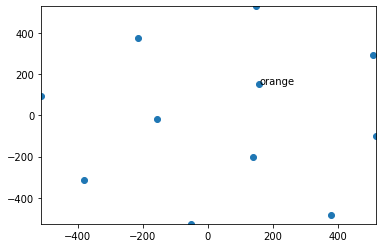

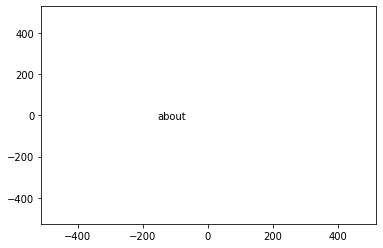

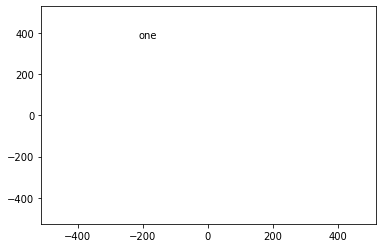

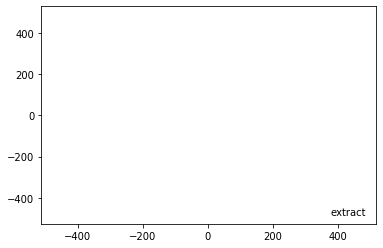

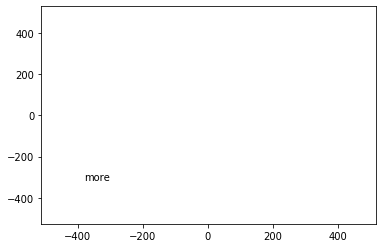

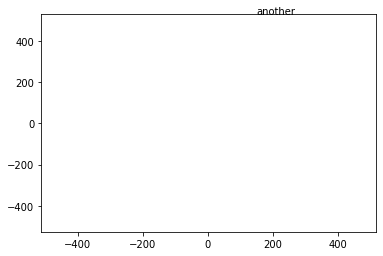

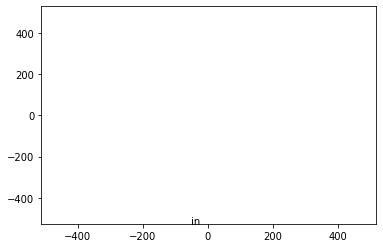

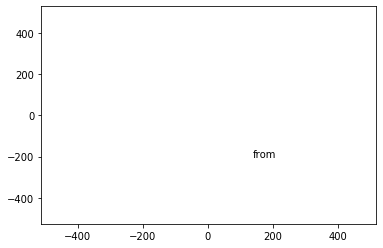

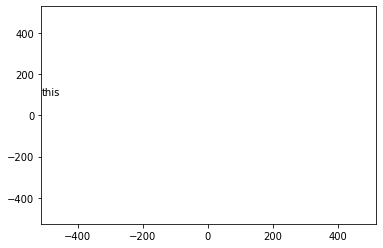

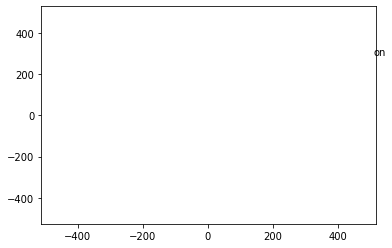

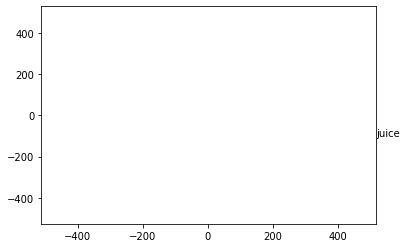

In [33]:
#for Word2Vec
display_closestwords_tsnescatterplot(model, 'orange', 20) 

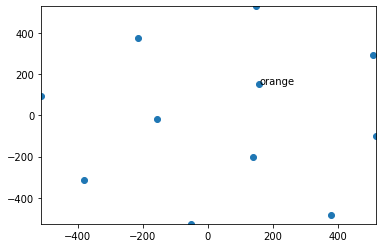

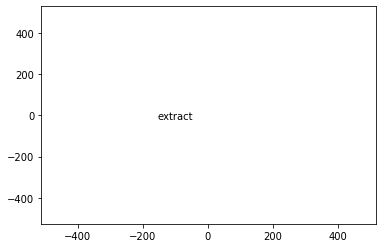

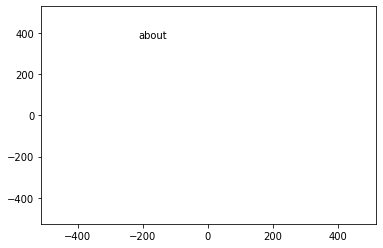

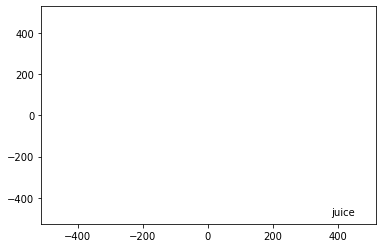

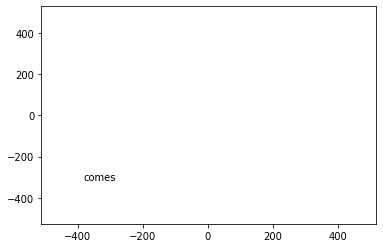

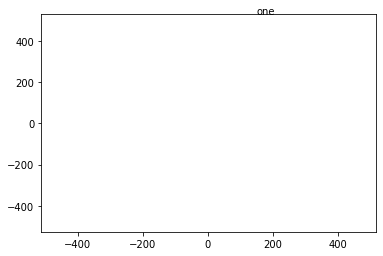

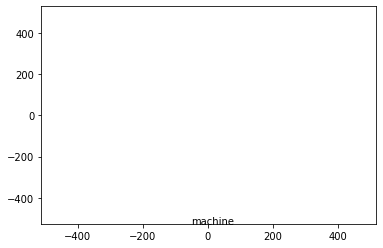

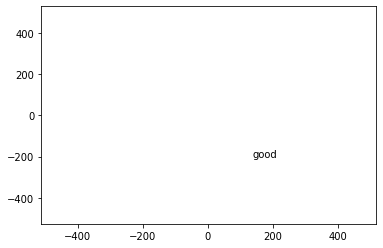

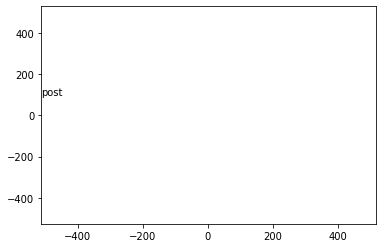

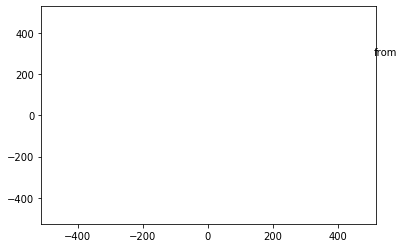

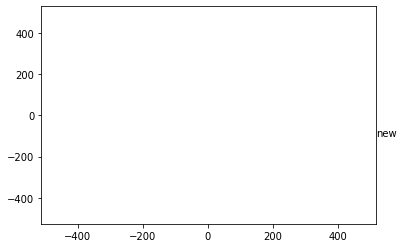

In [93]:
#for FastText
display_closestwords_tsnescatterplot(model_ft, 'orange', 10)

In [100]:
import numpy as np
 
def sent_vectorizer(sent, model):
    sent_vec = np.zeros(20)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model.wv[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))
 
V=[]
for sentence in sentences:
    V.append(sent_vectorizer(sentence, model))
    

In [99]:
Ft = []
for sentence in sentences:
    Ft.append(sent_vectorizer(sentence, model_ft))

In [101]:
Ft[0]


array([-0.5429004 ,  0.23807214, -0.6002917 ,  0.13657718,  0.24628471,
       -0.26469531,  0.09887034, -0.1299462 ,  0.24441731,  0.22903363])

In [40]:
V[0]

array([-0.01188202,  0.01163291, -0.11335758, -0.30648557, -0.28569272,
       -0.02999052, -0.3796702 ,  0.02928347, -0.07751176,  0.03574959,
        0.14097189, -0.18865491, -0.01899861,  0.04873278,  0.10135412,
       -0.13335817,  0.69631334,  0.22793496, -0.10976758, -0.15170737])

In [42]:
V

[array([-0.01188202,  0.01163291, -0.11335758, -0.30648557, -0.28569272,
        -0.02999052, -0.3796702 ,  0.02928347, -0.07751176,  0.03574959,
         0.14097189, -0.18865491, -0.01899861,  0.04873278,  0.10135412,
        -0.13335817,  0.69631334,  0.22793496, -0.10976758, -0.15170737]),
 array([-0.11508005, -0.11205478, -0.20042278, -0.23218407, -0.2329575 ,
         0.06566067, -0.18092113, -0.01376511,  0.17954058,  0.08470034,
         0.16184995,  0.07221727, -0.06373307,  0.31945147,  0.27910288,
        -0.19582089,  0.58050002,  0.28593187,  0.10697094, -0.25546809]),
 array([-0.04033173,  0.03490979, -0.21298672, -0.25849953,  0.21799227,
        -0.08950398,  0.29878612,  0.09503512, -0.28219221, -0.02655632,
        -0.08815569, -0.16101384, -0.18261661, -0.4906995 ,  0.00971465,
        -0.23662486,  0.47184739, -0.1543871 ,  0.19577835,  0.04553357]),
 array([ 0.07816748,  0.16796636, -0.16559279, -0.05561435, -0.28593792,
        -0.08717906, -0.21745582, -0.17284115

In [102]:
Ft

[array([-0.5429004 ,  0.23807214, -0.6002917 ,  0.13657718,  0.24628471,
        -0.26469531,  0.09887034, -0.1299462 ,  0.24441731,  0.22903363]),
 array([-0.28635985,  0.10076938, -0.76030493,  0.1848497 ,  0.21813349,
        -0.25124232,  0.17123794, -0.31415261, -0.00860599,  0.23836376]),
 array([-0.37434079, -0.07224928,  0.3425173 , -0.47863582, -0.34981759,
         0.06126298, -0.31822425, -0.49979776,  0.13229013,  0.11639594]),
 array([-0.22112043,  0.3762987 , -0.4923672 ,  0.57592395,  0.04600418,
         0.17394183, -0.14864405,  0.41548679,  0.01270893,  0.09018431]),
 array([-0.28338127,  0.14887039, -0.60565637,  0.53110072, -0.37220022,
        -0.21600472,  0.15935703, -0.18624948,  0.00022643, -0.05805525]),
 array([-0.36895302, -0.53592721, -0.25437834,  0.22075489, -0.12338124,
         0.21330898, -0.01812752,  0.44354221, -0.06550538, -0.44848826]),
 array([-0.37788853,  0.11215596, -0.67873891,  0.0794985 ,  0.2221971 ,
        -0.25543924,  0.07328874, -0.39